In [1]:
#decision tree, KNN, Logistic Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, log_loss, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [3]:
detectionData = pd.read_csv('/content/drive/MyDrive/detect_dataset.csv')

In [4]:
detectionData

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [5]:
detectionData['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

In [6]:
Xdetection = detectionData.iloc[:, 1:].values
ydetection = detectionData.iloc[:, 0].values

In [7]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xdetection, ydetection, test_size = 0.2, random_state = 0)

In [8]:
sc = StandardScaler()
Xd_train = sc.fit_transform(Xd_train)
Xd_test = sc.transform(Xd_test)

In [9]:
#logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
models = {"Logistic Regression": LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000),
          "decisionTree":DecisionTreeClassifier(),
          "randomForest":RandomForestClassifier(),
          "knn":KNeighborsClassifier(),
          "svc":SVC(kernel='linear',C=1)}

In [12]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
def ModelScore(modelDict, X_train,y_train,X_test,y_test):
    final = {}
    accuracy_list = []
    log_loss_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    scores=[]
    for name, model in modelDict.items():
        model.fit(X_train, y_train)
        clf=model.fit(X_train, y_train)
        pred = model.predict(X_test)
        sns.heatmap(confusion_matrix(y_test, pred), annot = True,fmt = '.0f')
        plt.show()
        print(classification_report(y_test, pred))
        accuracy_list.append(accuracy_score(y_test, pred))
        precision_score_list.append(precision_score(y_test, pred,average='micro'))
        recall_score_list.append(recall_score(y_test, pred,average='micro'))
        f1_score_list.append(f1_score(y_test, pred,average='micro'))
        scores.append(cross_val_score(clf, X_test, y_test, cv=5).mean())
    return pd.DataFrame({"Model":modelDict.keys(),
                        "Accuracy":accuracy_list,
                        "Precison":precision_score_list,
                        "Recall":recall_score_list,
                        "F1-Score":f1_score_list,
                        " k-fold Cross Validation score k=5":scores})

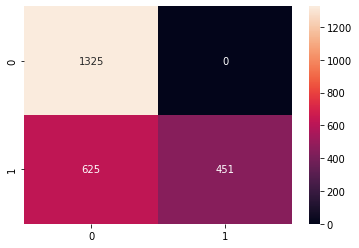

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1325
           1       1.00      0.42      0.59      1076

    accuracy                           0.74      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.74      0.71      2401



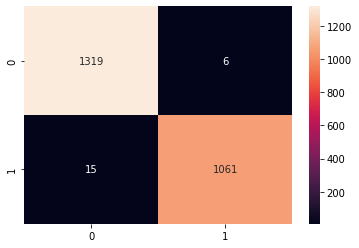

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1325
           1       0.99      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



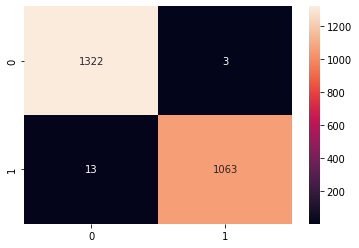

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1325
           1       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



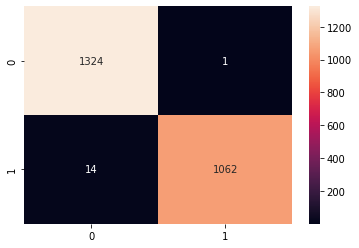

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1325
           1       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



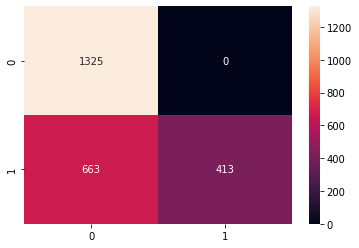

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1325
           1       1.00      0.38      0.55      1076

    accuracy                           0.72      2401
   macro avg       0.83      0.69      0.68      2401
weighted avg       0.82      0.72      0.69      2401



,Model,Accuracy,Precison,Recall,F1-Score,k-fold Cross Validation score k=5
0,Logistic Regression,0.739692,0.739692,0.739692,0.739692,0.704289
1,decisionTree,0.991254,0.991254,0.991254,0.991254,0.991670
2,randomForest,0.993336,0.993336,0.993336,0.993336,0.995835
3,knn,0.993753,0.993753,0.993753,0.993753,0.992087
4,svc,0.723865,0.723865,0.723865,0.723865,0.700129


In [13]:
ModelScore(models,Xd_train,yd_train ,Xd_test,yd_test)

In [14]:
#ANN Model

In [15]:
detectionANN = Sequential()
detectionANN.add(Dense(units=6, activation='relu'))
detectionANN.add(Dense(units=6, activation='relu'))
detectionANN.add(Dense(units=1, activation='sigmoid'))
detectionANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
detectionANN.fit(Xd_train, yd_train, batch_size = 32, epochs = 100)

Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.5107 - accuracy: 0.8192
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2064 - accuracy: 0.9539
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9729
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9794
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0582 - accuracy: 0.9820
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0494 - accuracy: 0.9846
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0441 - accuracy: 0.9859
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0399 - accuracy: 0.9878
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9886
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0351 - accura

In [17]:
#Results

yd_pred = detectionANN.predict(Xd_test)
yd_pred = (yd_pred > 0.5)
print(np.concatenate((yd_pred.reshape(len(yd_pred),1), yd_test.reshape(len(yd_test),1)),1))

76/76 [==============================] - 0s 1ms/step
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


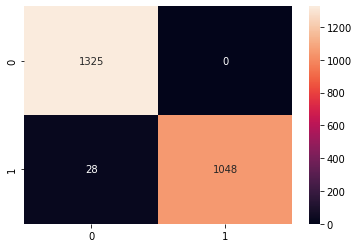

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1325
           1       1.00      0.97      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



In [18]:
sns.heatmap(confusion_matrix(yd_test, yd_pred), annot = True,fmt = '.0f')
plt.show()
print(classification_report(yd_test, yd_pred))

In [19]:
#Fault Classification
#Data Preprocessing

In [95]:
classData = pd.read_csv('/content/drive/MyDrive/classData.csv')

In [96]:
classData.shape

(7861, 10)

In [97]:
classData.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [98]:
Xclass = classData.iloc[:, 4:].values
yclass = classData.iloc[:, 0:4].values

In [99]:
print(Xclass[0,:])

[-1.51291812e+02 -9.67745156e+00  8.58001623e+01  4.00749853e-01
 -1.32934945e-01 -2.67814907e-01]


In [100]:
print(yclass[0,:])

[1 0 0 1]


In [101]:
faults = ["None", "LG Fault", "LL Fault", "LLG Fault", "LLL Fault", "LLLG Fault"]
yc = []
for f in yclass:
  if f[0] == 0 and f[1] == 0 and f[2] == 0 and f[3] == 0:
    yc.append(faults[0])
  elif f[0] == 1 and f[1] == 0 and f[2] == 0 and f[3] == 1:
    yc.append(faults[1])
  elif f[0] == 0 and f[1] == 1 and f[2] == 1 and f[3] == 0:
    yc.append(faults[2])
  elif f[0] == 1 and f[1] == 0 and f[2] == 1 and f[3] == 1:
    yc.append(faults[3])
  elif f[0] == 0 and f[1] == 1 and f[2] == 1 and f[3] == 1:
    yc.append(faults[4])
  else:
    yc.append(faults[5])
yc = np.array(yc)
print(f"No Fault : {len(yc[yc==faults[0]])}")
print(f"LF Fault : {len(yc[yc==faults[1]])}")
print(f"LL Fault : {len(yc[yc==faults[2]])}")
print(f"LLG Fault : {len(yc[yc==faults[3]])}")
print(f"LLL Fault : {len(yc[yc==faults[4]])}")
print(f"LLLG Fault : {len(yc[yc==faults[5]])}")
yclass = yc

No Fault : 2365
LF Fault : 1129
LL Fault : 1004
LLG Fault : 1134
LLL Fault : 1096
LLLG Fault : 1133


In [102]:
yc

array(['LG Fault', 'LG Fault', 'LG Fault', ..., 'None', 'None', 'None'],
      dtype='<U10')

In [103]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xclass, yclass, test_size = 0.2, random_state = 0)

In [104]:
Xc_train

array([[ 1.51520694e+01, -3.05197799e+01,  1.22991568e+01,
         5.85121212e-01, -1.95849727e-01, -3.89271485e-01],
       [ 8.26151276e+02, -1.39184699e+02, -6.84910051e+02,
         3.17252940e-02, -4.01255130e-02,  8.40021900e-03],
       [-7.79373281e+02,  2.90121627e+01,  7.50358886e+02,
        -3.50356460e-02,  3.81934650e-02, -3.15781900e-03],
       ...,
       [-1.73751503e+02, -6.59470576e+02, -5.77503294e+01,
        -4.06884970e-02,  2.88971190e-01, -2.48282692e-01],
       [-6.83435357e+00,  6.79602466e+02, -6.70089556e+02,
         3.74728951e-01,  1.84094470e-02, -3.93138399e-01],
       [ 5.19590442e+01, -6.16080557e+02,  5.66717809e+02,
         1.60677187e-01,  2.82198520e-02, -1.88897039e-01]])

In [105]:
Xc_test

array([[ 6.04204114e+02,  2.36572840e+02,  4.97966695e+01,
         4.06573640e-02, -3.73332069e-01,  3.32674704e-01],
       [-2.16679879e+02, -6.33710206e+02,  8.50387822e+02,
        -4.12207550e-02,  1.21108330e-02,  2.91099210e-02],
       [-4.96863032e+00,  8.50363194e+01, -8.30856473e+01,
        -5.97811525e-01,  4.47736430e-01,  1.50075095e-01],
       ...,
       [ 5.61224100e+02,  3.10108822e+02, -8.71333543e+02,
         4.14783870e-02, -2.81906480e-02, -1.32877380e-02],
       [-7.28153419e+02,  1.48736832e+02, -1.91137825e+01,
         7.56229900e-03,  2.99381914e-01, -3.06944213e-01],
       [-6.84411668e+01,  2.51399383e+02, -1.80606300e+02,
        -4.07823367e-01, -4.10725490e-02,  4.48895916e-01]])

In [106]:
yc_train

array(['None', 'LLL Fault', 'LLLG Fault', ..., 'LLG Fault', 'LL Fault',
       'LL Fault'], dtype='<U10')

In [107]:
yc_test

array(['LLG Fault', 'LLLG Fault', 'None', ..., 'LLLG Fault', 'LLG Fault',
       'LL Fault'], dtype='<U10')

In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(yc_train)
le.classes_
yc_test=le.transform(yc_test)
yc_train=le.transform(yc_train)

In [109]:
sc = StandardScaler()
Xc_train = sc.fit_transform(Xc_train)
Xc_test = sc.transform(Xc_test)

In [110]:
from sklearn import svm
clf = svm.SVC()
clf.fit(Xc_train, yc_train)
y_pred = clf.predict(Xc_test)

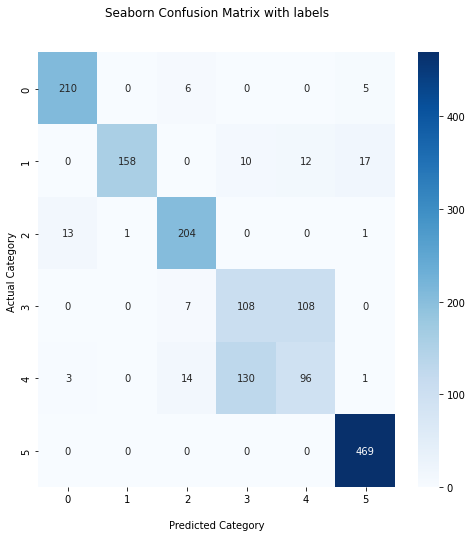

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       221
           1       0.99      0.80      0.89       197
           2       0.88      0.93      0.91       219
           3       0.44      0.48      0.46       223
           4       0.44      0.39      0.42       244
           5       0.95      1.00      0.98       469

    accuracy                           0.79      1573
   macro avg       0.77      0.76      0.76      1573
weighted avg       0.79      0.79      0.79      1573



In [111]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cf_matrix = confusion_matrix(yc_test, y_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(yc_test, y_pred))

In [112]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(Xc_train, yc_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(Xc_test)

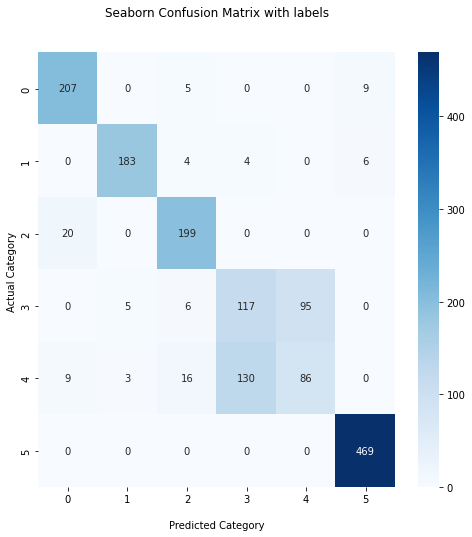

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       221
           1       0.96      0.93      0.94       197
           2       0.87      0.91      0.89       219
           3       0.47      0.52      0.49       223
           4       0.48      0.35      0.40       244
           5       0.97      1.00      0.98       469

    accuracy                           0.80      1573
   macro avg       0.77      0.78      0.77      1573
weighted avg       0.79      0.80      0.80      1573



In [113]:
cf_matrix = confusion_matrix(yc_test, y_test_tree)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(yc_test, y_test_tree))

In [114]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(Xc_train, yc_train)

#predicting the target value from the model for the samples
y_test_xgb = model.predict(Xc_test)

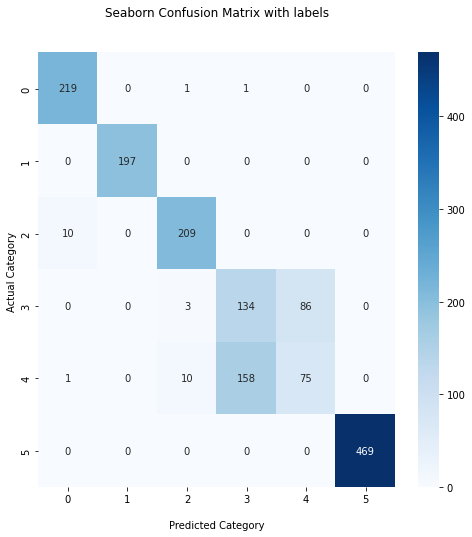

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       221
           1       1.00      1.00      1.00       197
           2       0.94      0.95      0.95       219
           3       0.46      0.60      0.52       223
           4       0.47      0.31      0.37       244
           5       1.00      1.00      1.00       469

    accuracy                           0.83      1573
   macro avg       0.80      0.81      0.80      1573
weighted avg       0.82      0.83      0.82      1573



In [115]:
cf_matrix = confusion_matrix(yc_test, y_test_xgb)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(yc_test, y_test_xgb))

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
forest = RandomForestClassifier(criterion='gini',n_estimators=5,random_state=1,n_jobs=2)
#
# Fit the model
#
forest.fit(Xc_train, yc_train)
#
# Measure model performance
#
y_pred = forest.predict(Xc_test)

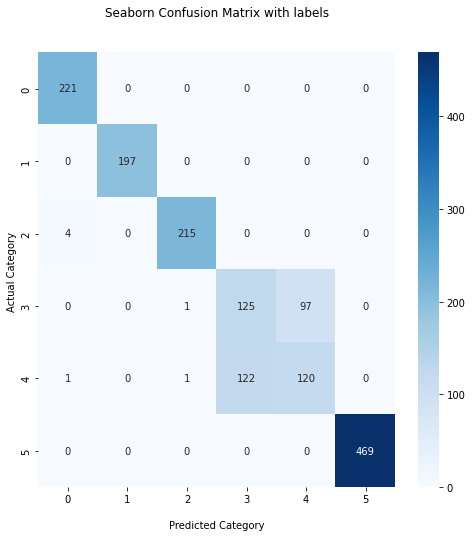

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       221
           1       1.00      1.00      1.00       197
           2       0.99      0.98      0.99       219
           3       0.51      0.56      0.53       223
           4       0.55      0.49      0.52       244
           5       1.00      1.00      1.00       469

    accuracy                           0.86      1573
   macro avg       0.84      0.84      0.84      1573
weighted avg       0.86      0.86      0.86      1573



In [118]:
cf_matrix = confusion_matrix(yc_test, y_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(yc_test, y_pred))

In [119]:
le.classes_

array(['LG Fault', 'LL Fault', 'LLG Fault', 'LLL Fault', 'LLLG Fault',
       'None'], dtype='<U10')

In [120]:
#ANN Model

In [143]:


classANN = Sequential()
classANN.add(Dense(units=12, activation='relu'))
classANN.add(Dense(units=12, activation='relu'))
classANN.add(Dense(units=6, activation='sigmoid'))
classANN.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])



In [144]:
classANN.fit(Xc_train, yc_train, batch_size = 16, epochs = 100)

Epoch 1/100
393/393 [==============================] - 1s 2ms/step - loss: 1.5409 - accuracy: 0.3655
Epoch 2/100
393/393 [==============================] - 1s 2ms/step - loss: 0.9660 - accuracy: 0.6045
Epoch 3/100
393/393 [==============================] - 1s 2ms/step - loss: 0.6695 - accuracy: 0.7333
Epoch 4/100
393/393 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7729
Epoch 5/100
393/393 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7901
Epoch 6/100
393/393 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.7982
Epoch 7/100
393/393 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.8119
Epoch 8/100
393/393 [==============================] - 1s 2ms/step - loss: 0.3709 - accuracy: 0.8184
Epoch 9/100
393/393 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8222
Epoch 10/100
393/393 [==============================] - 1s 2ms/step - loss: 0.3421 - accura

In [123]:

#Results

loss, acc = classANN.evaluate(Xc_test, yc_test)
print(f'Accuracy : {acc*100} %')



50/50 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.8385
Accuracy : 83.8525116443634 %


In [124]:
y_pred = classANN.predict(Xc_test)

50/50 [==============================] - 0s 1ms/step


In [125]:
yc_test

array([2, 4, 5, ..., 4, 2, 1])

In [126]:
y_pred

array([[2.2473691e-04, 1.2533265e-08, 9.9780905e-01, 3.5121590e-01,
        8.5045666e-01, 2.8730611e-07],
       [1.4747086e-07, 8.1945952e-09, 1.5407841e-18, 9.9986261e-01,
        9.9980891e-01, 5.7064216e-23],
       [3.1133089e-09, 9.5762953e-11, 3.8921562e-22, 8.8693039e-11,
        4.1097704e-07, 1.0000000e+00],
       ...,
       [4.4702350e-10, 2.2127610e-05, 3.5912235e-28, 9.8461628e-01,
        9.8189592e-01, 8.2387830e-22],
       [6.0486887e-02, 1.5703273e-12, 9.9992913e-01, 3.5756652e-04,
        7.4511663e-05, 1.2454839e-08],
       [1.4706519e-19, 1.0000000e+00, 1.6812881e-18, 1.8337596e-09,
        3.2989286e-07, 9.9866003e-01]], dtype=float32)

In [127]:
classes_x=np.argmax(y_pred,axis=1)

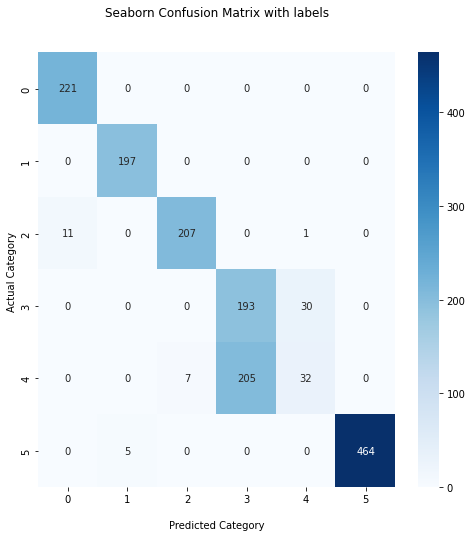

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       221
           1       0.98      1.00      0.99       197
           2       0.97      0.95      0.96       219
           3       0.48      0.87      0.62       223
           4       0.51      0.13      0.21       244
           5       1.00      0.99      0.99       469

    accuracy                           0.84      1573
   macro avg       0.81      0.82      0.79      1573
weighted avg       0.84      0.84      0.81      1573



In [128]:


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cf_matrix = confusion_matrix(yc_test, classes_x)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(yc_test, classes_x))

In [131]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
from scikeras.wrappers import KerasClassifier

In [136]:
Xc_train

array([[-4.65138522e-03,  4.53287364e-02, -6.31571996e-02,
         2.04006119e+00, -6.18967252e-01, -1.28967221e+00],
       [ 1.73800495e+00, -2.02836365e-01, -1.95865452e+00,
         1.33014078e-01, -1.23717313e-01,  9.81694844e-04],
       [-1.71190908e+00,  1.81285683e-01,  1.94340012e+00,
        -9.70495231e-02,  1.25360643e-01, -3.65302194e-02],
       ...,
       [-4.10563012e-01, -1.39104686e+00, -2.53600200e-01,
        -1.16529705e-01,  9.22909397e-01, -8.32089398e-01],
       [-5.18953023e-02,  1.66708082e+00, -1.91836215e+00,
         1.31503243e+00,  6.24415027e-02, -1.30222238e+00],
       [ 7.44385910e-02, -1.29195427e+00,  1.44413653e+00,
         5.77392734e-01,  9.36415476e-02, -6.39351710e-01]])

In [137]:
yc_train

array([5, 3, 4, ..., 2, 1, 1])

In [155]:
from sklearn.ensemble import VotingClassifier

model1 = VotingClassifier(estimators=[('xgb', model), ('tree', tree),('rf',forest),('svm',clf)], voting='hard')
model1._estimator_type = "classifier"
model1.fit(Xc_train,yc_train)

VotingClassifier(estimators=[('xgb', XGBClassifier(objective='multi:softprob')),
                             ('tree', DecisionTreeClassifier(max_depth=5)),
                             ('rf',
                              RandomForestClassifier(n_estimators=5, n_jobs=2,
                                                     random_state=1)),
                             ('svm', SVC())])

In [156]:
pred = model1.predict(Xc_test)

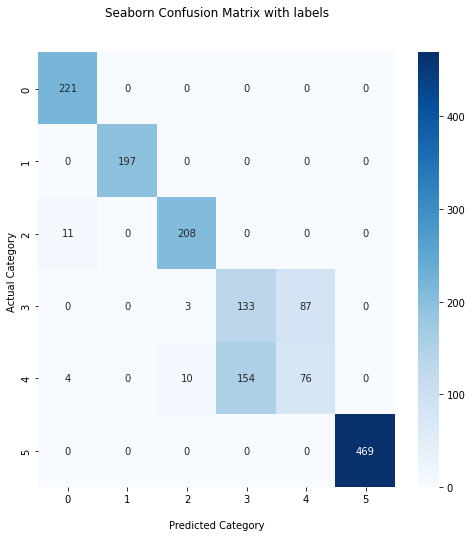

In [157]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(yc_test, pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [158]:
plt.show()
print(classification_report(yc_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       221
           1       1.00      1.00      1.00       197
           2       0.94      0.95      0.95       219
           3       0.46      0.60      0.52       223
           4       0.47      0.31      0.37       244
           5       1.00      1.00      1.00       469

    accuracy                           0.83      1573
   macro avg       0.80      0.81      0.80      1573
weighted avg       0.82      0.83      0.82      1573

